In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [6]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,NaN,2.0
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,NaN,2.0
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,NaN,2.0


In [8]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


108.0    1
98.0     1
267.0    1
284.0    1
566.0    1
        ..
431.0    1
518.0    1
411.0    1
428.0    1
220.0    1
Name: Name, Length: 891, dtype: int64


1.0    577
0.0    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


333.0    7
568.0    7
80.0     7
249.0    6
566.0    6
        ..
513.0    1
98.0     1
212.0    1
606.0    1
466.0    1
Name: Ticket, Length: 681, dtype: int64


8.0500     43
13.0000    

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data=data.drop(columns='Cabin')

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,2.0


In [12]:
data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [13]:
data['Age']=data["Age"].fillna(data["Age"].mean())

In [ ]:
data['Embarked'].value_counts()

In [ ]:
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])

In [ ]:
data.isna().sum()

In [15]:
data["Embarked"].value_counts()

2.0    644
0.0    168
1.0     77
Name: Embarked, dtype: int64

In [16]:
data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,1.535433
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.792088
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


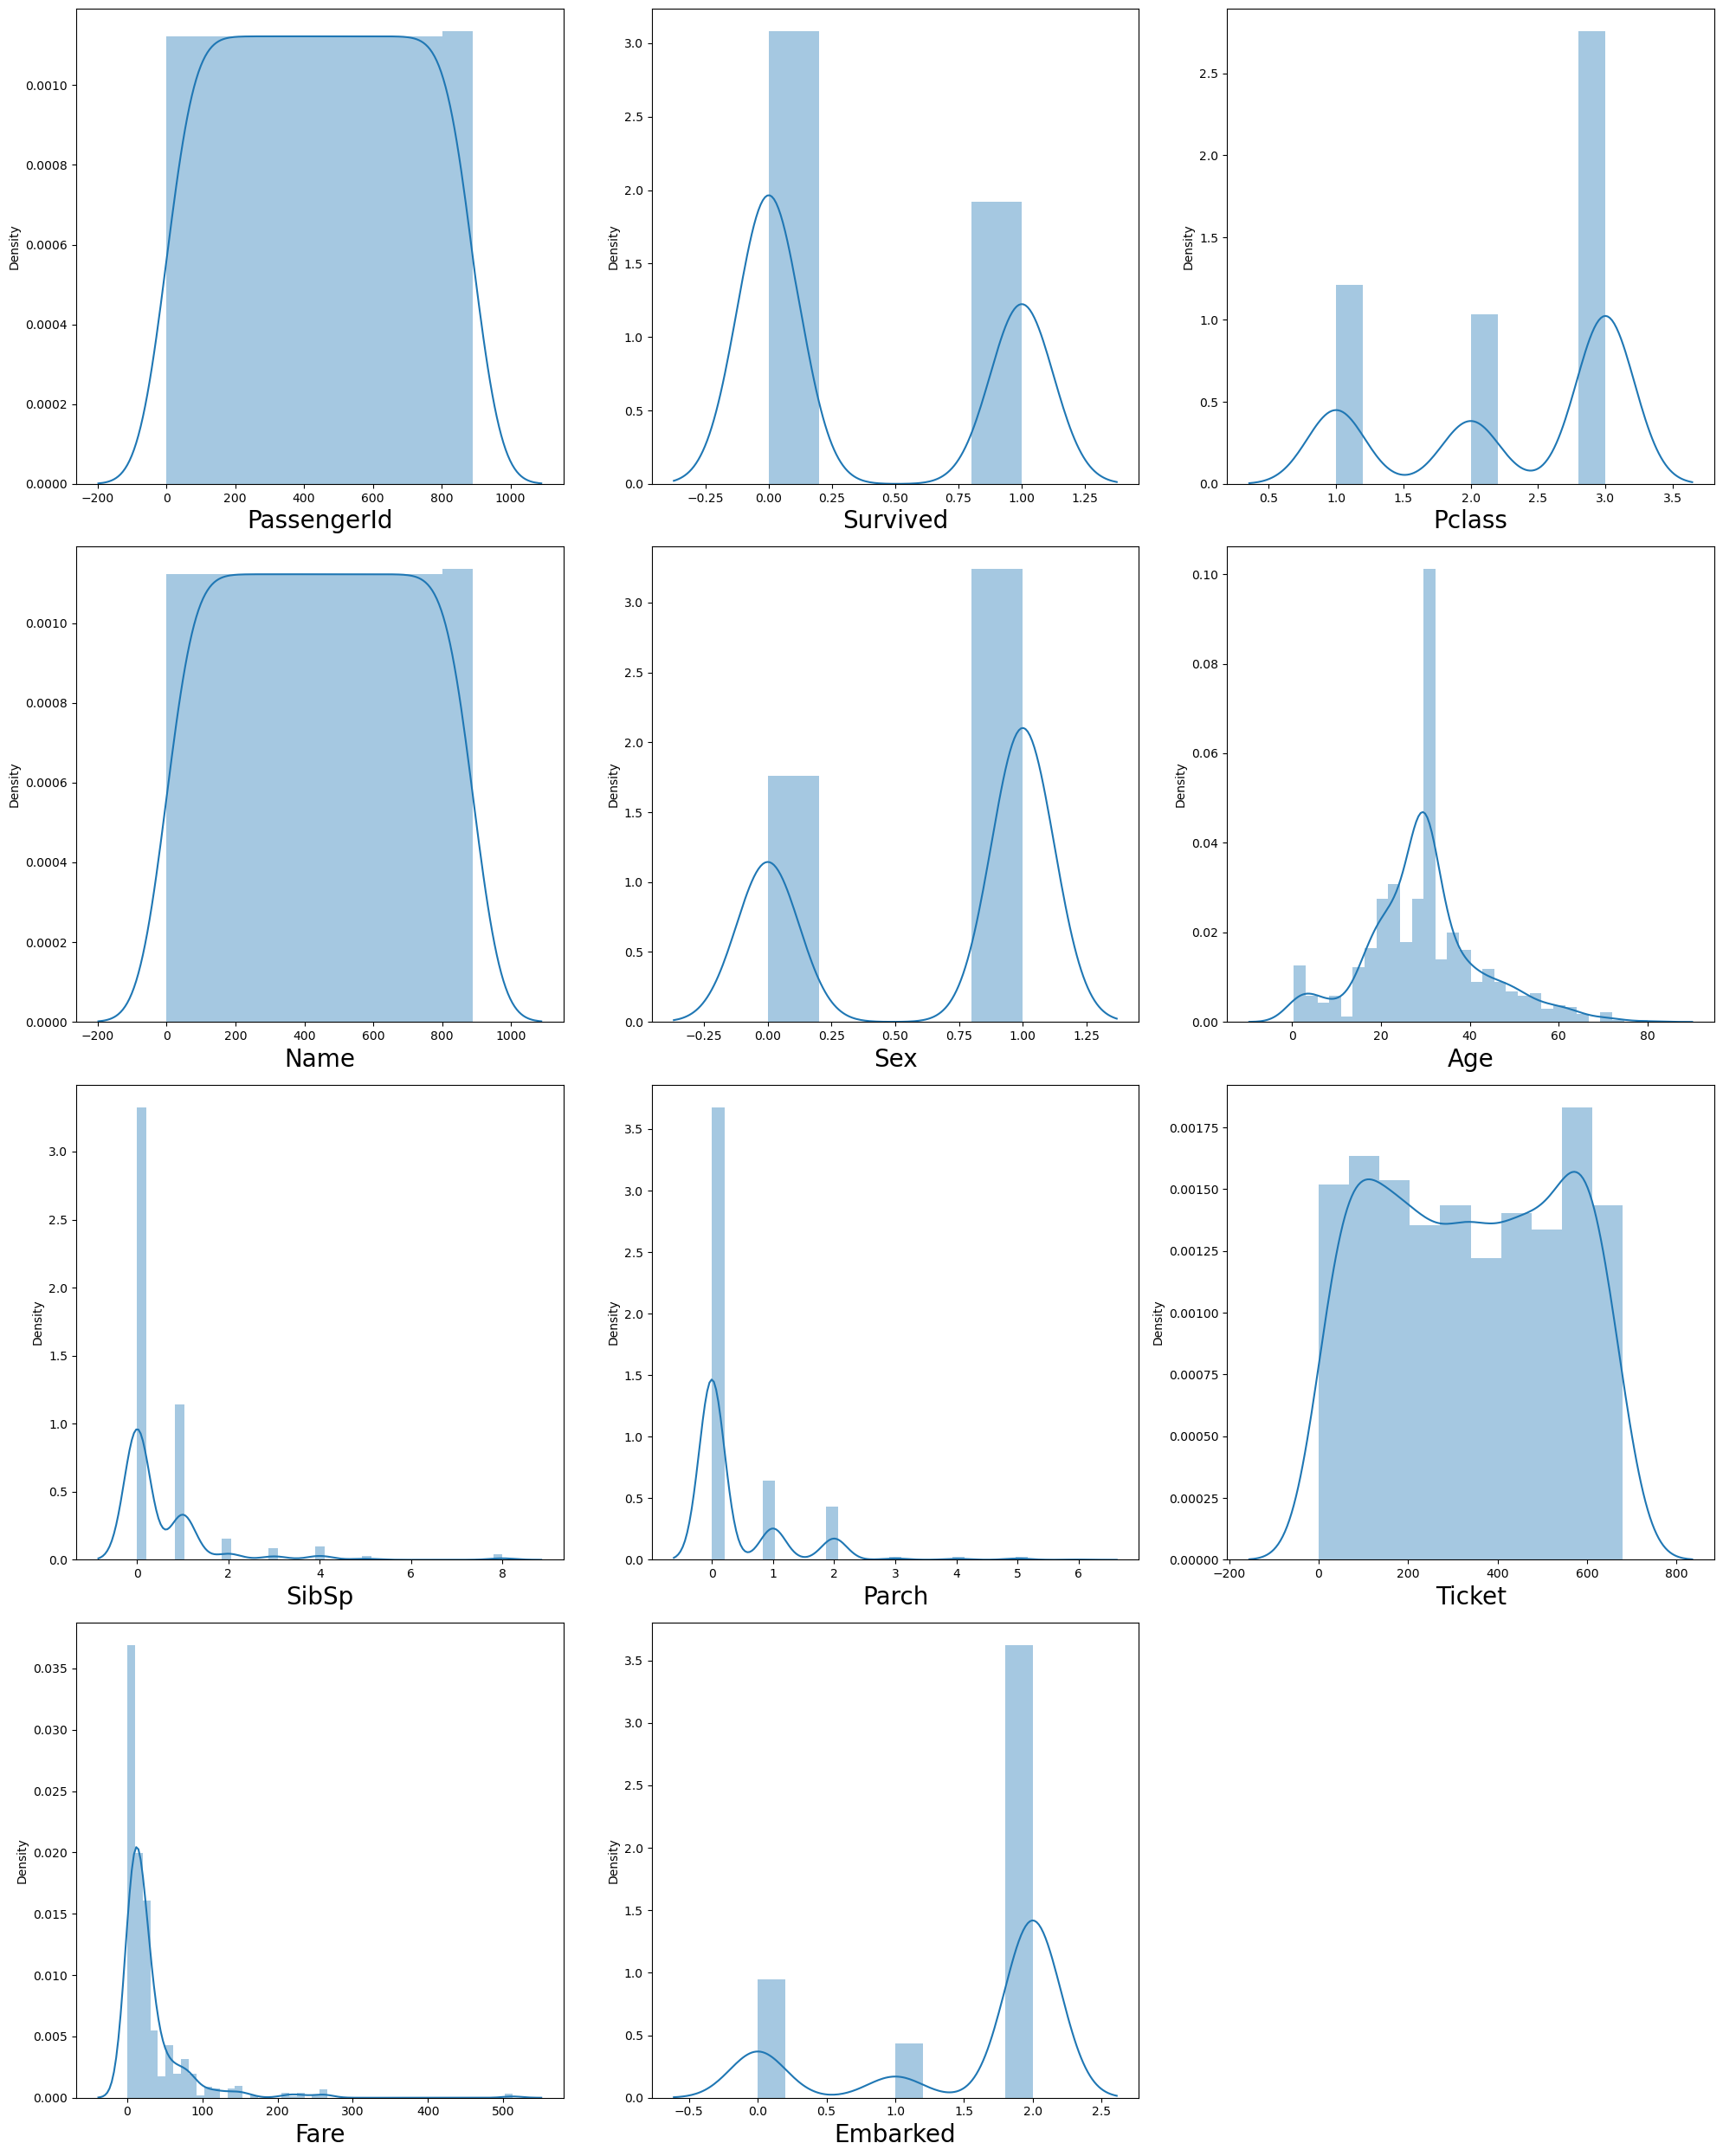

In [17]:
plt.figure(figsize=(20,25),facecolor="w")
plot=1
for i in data:
    if plot<=15:
        ax=plt.subplot(4,3,plot)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

In [18]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.261367
dtype: float64

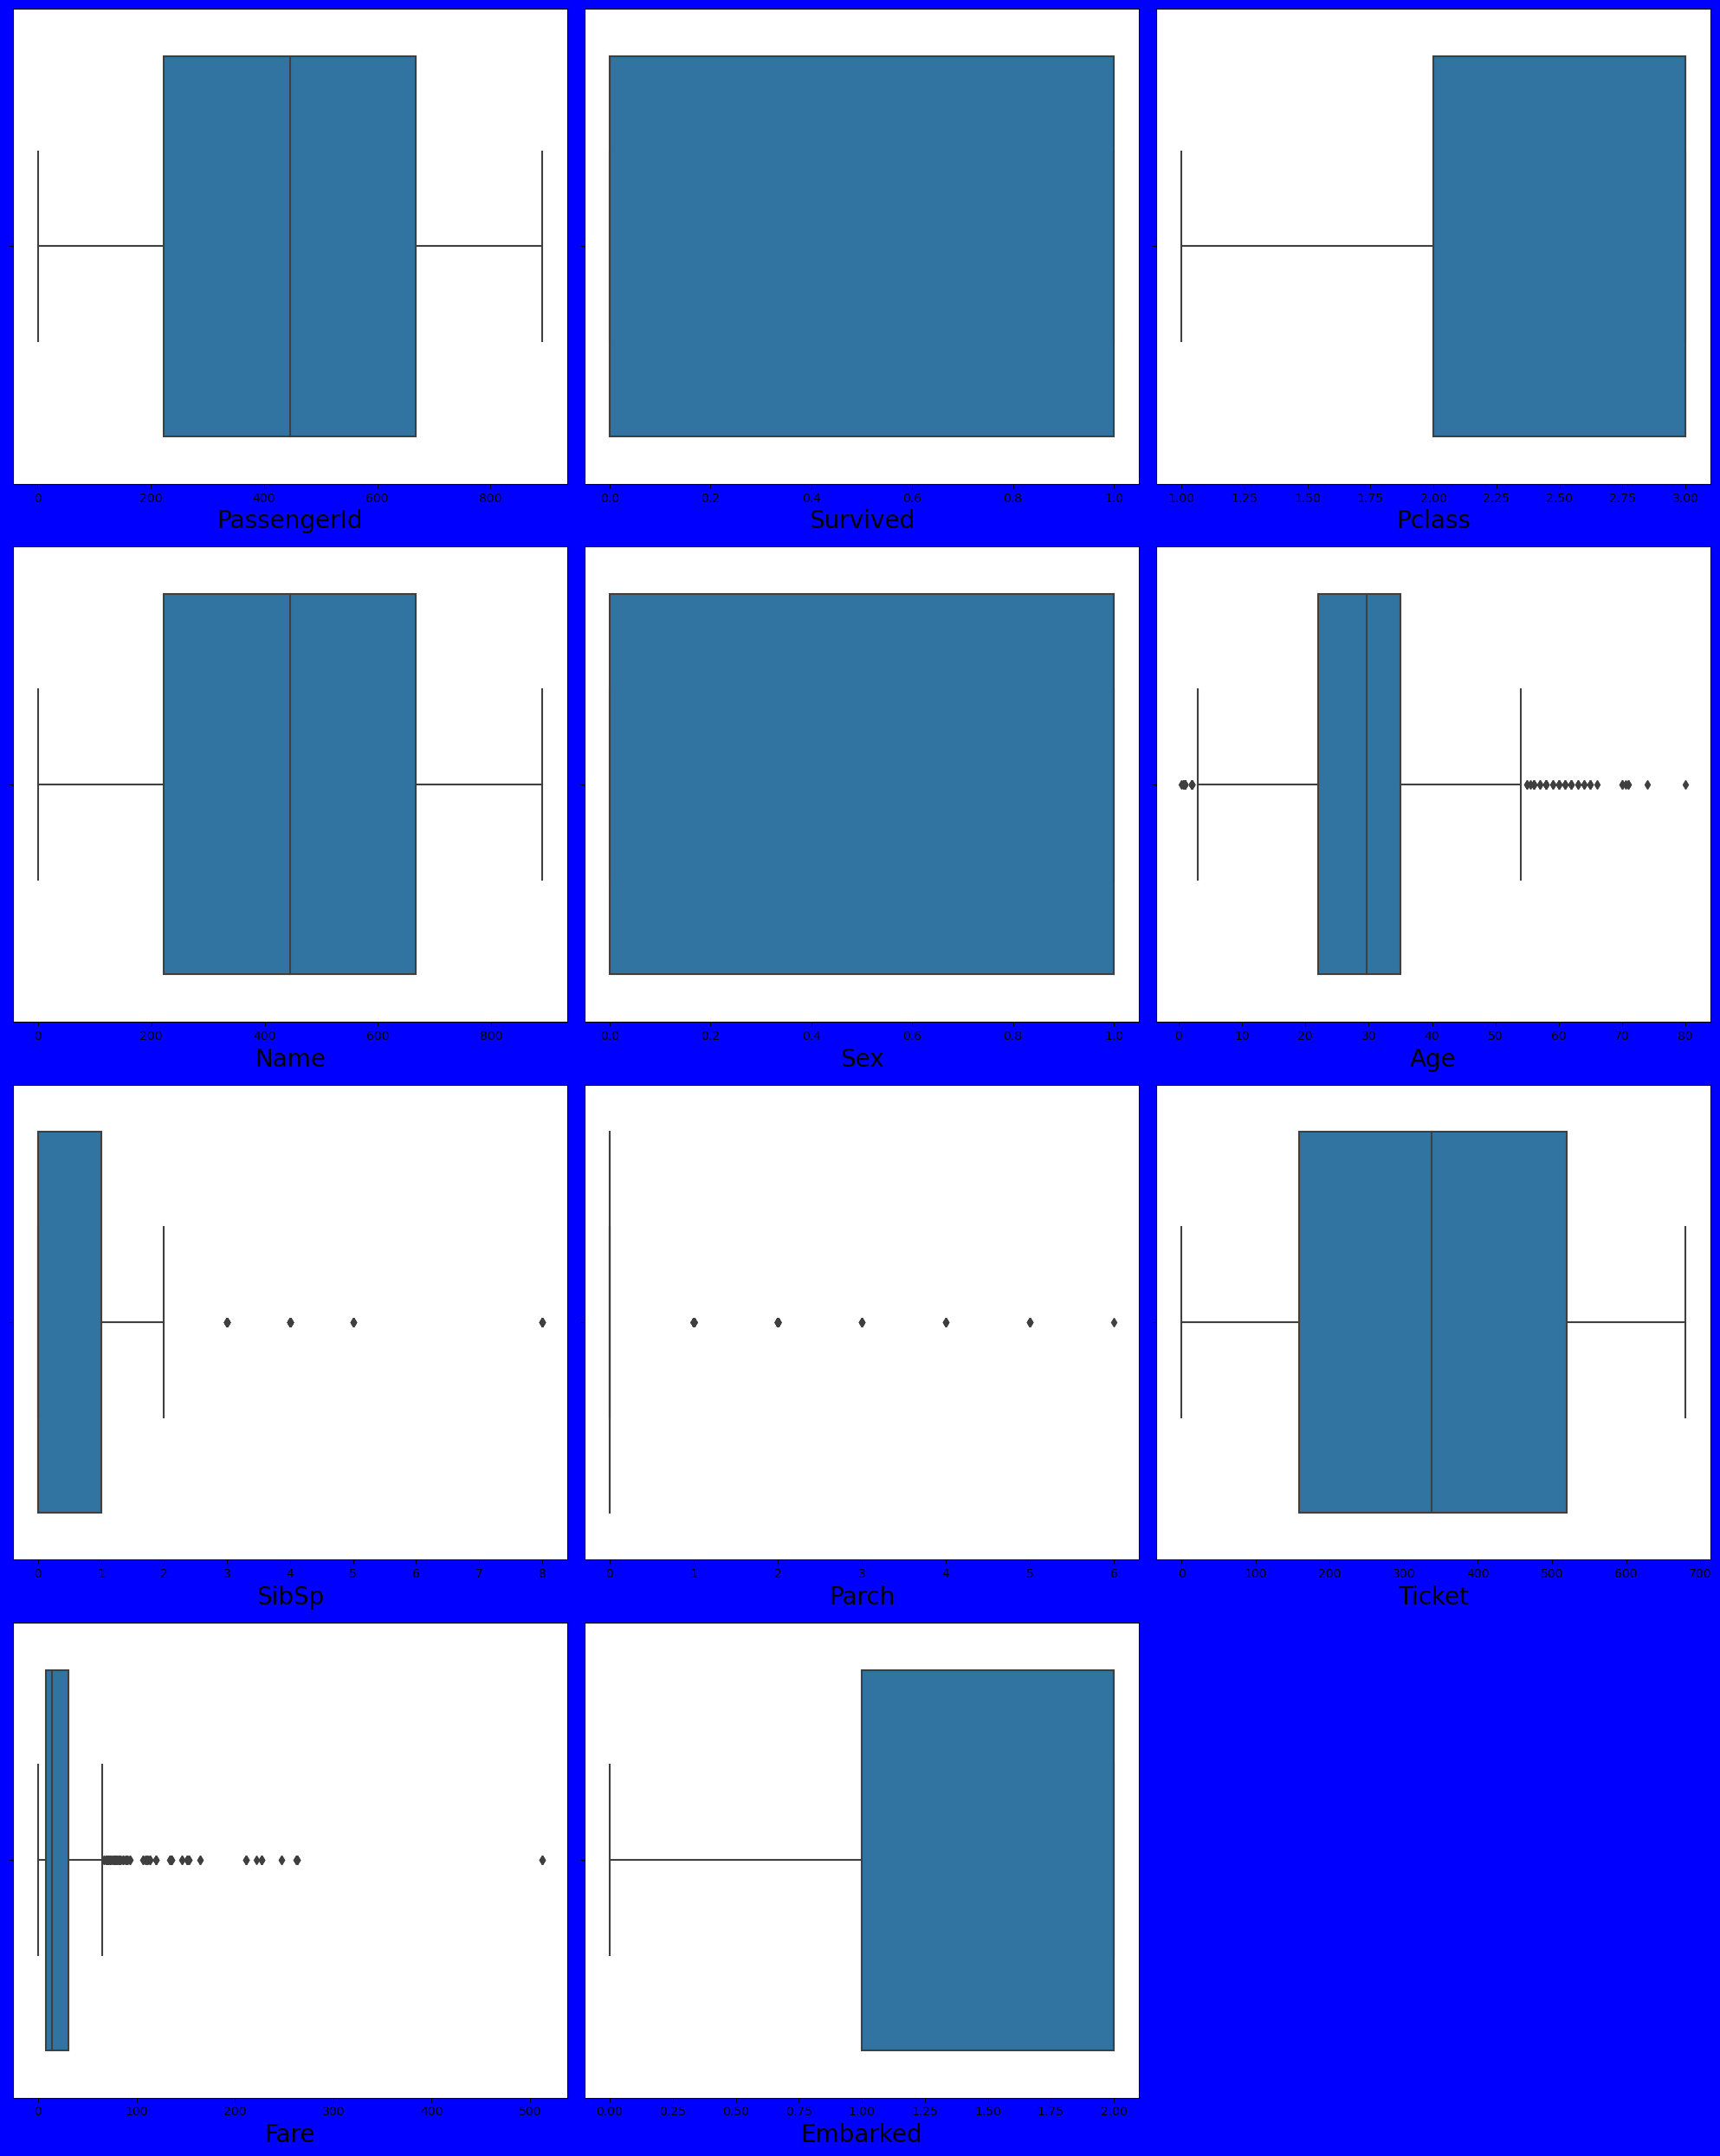

In [19]:
plt.figure(figsize=(20,25),facecolor="b")
plot=1
for i in data:
    if plot<=15:
        ax=plt.subplot(4,3,plot)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

In [20]:
q1=data.quantile(.25)
q2=data.quantile(.50)
q3=data.quantile(.75)

In [21]:
iqr=q3-q1

In [22]:
iqr

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Name           445.0000
Sex              1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Ticket         361.0000
Fare            23.0896
Embarked         1.0000
dtype: float64

In [23]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.261367
dtype: float64

In [24]:
age_high=q3.Age+(1.5*iqr.Age)
ind_num=np.where(age_high<data['Age'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(849, 11)

In [25]:
age_low=q3.Age-(1.5*iqr.Age)
ind_num=np.where(age_low>data["Age"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(766, 11)

In [26]:
fa_high=q3.Fare+(1.5*iqr.Fare)
ind_num=np.where(fa_high<data['Fare'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(666, 11)

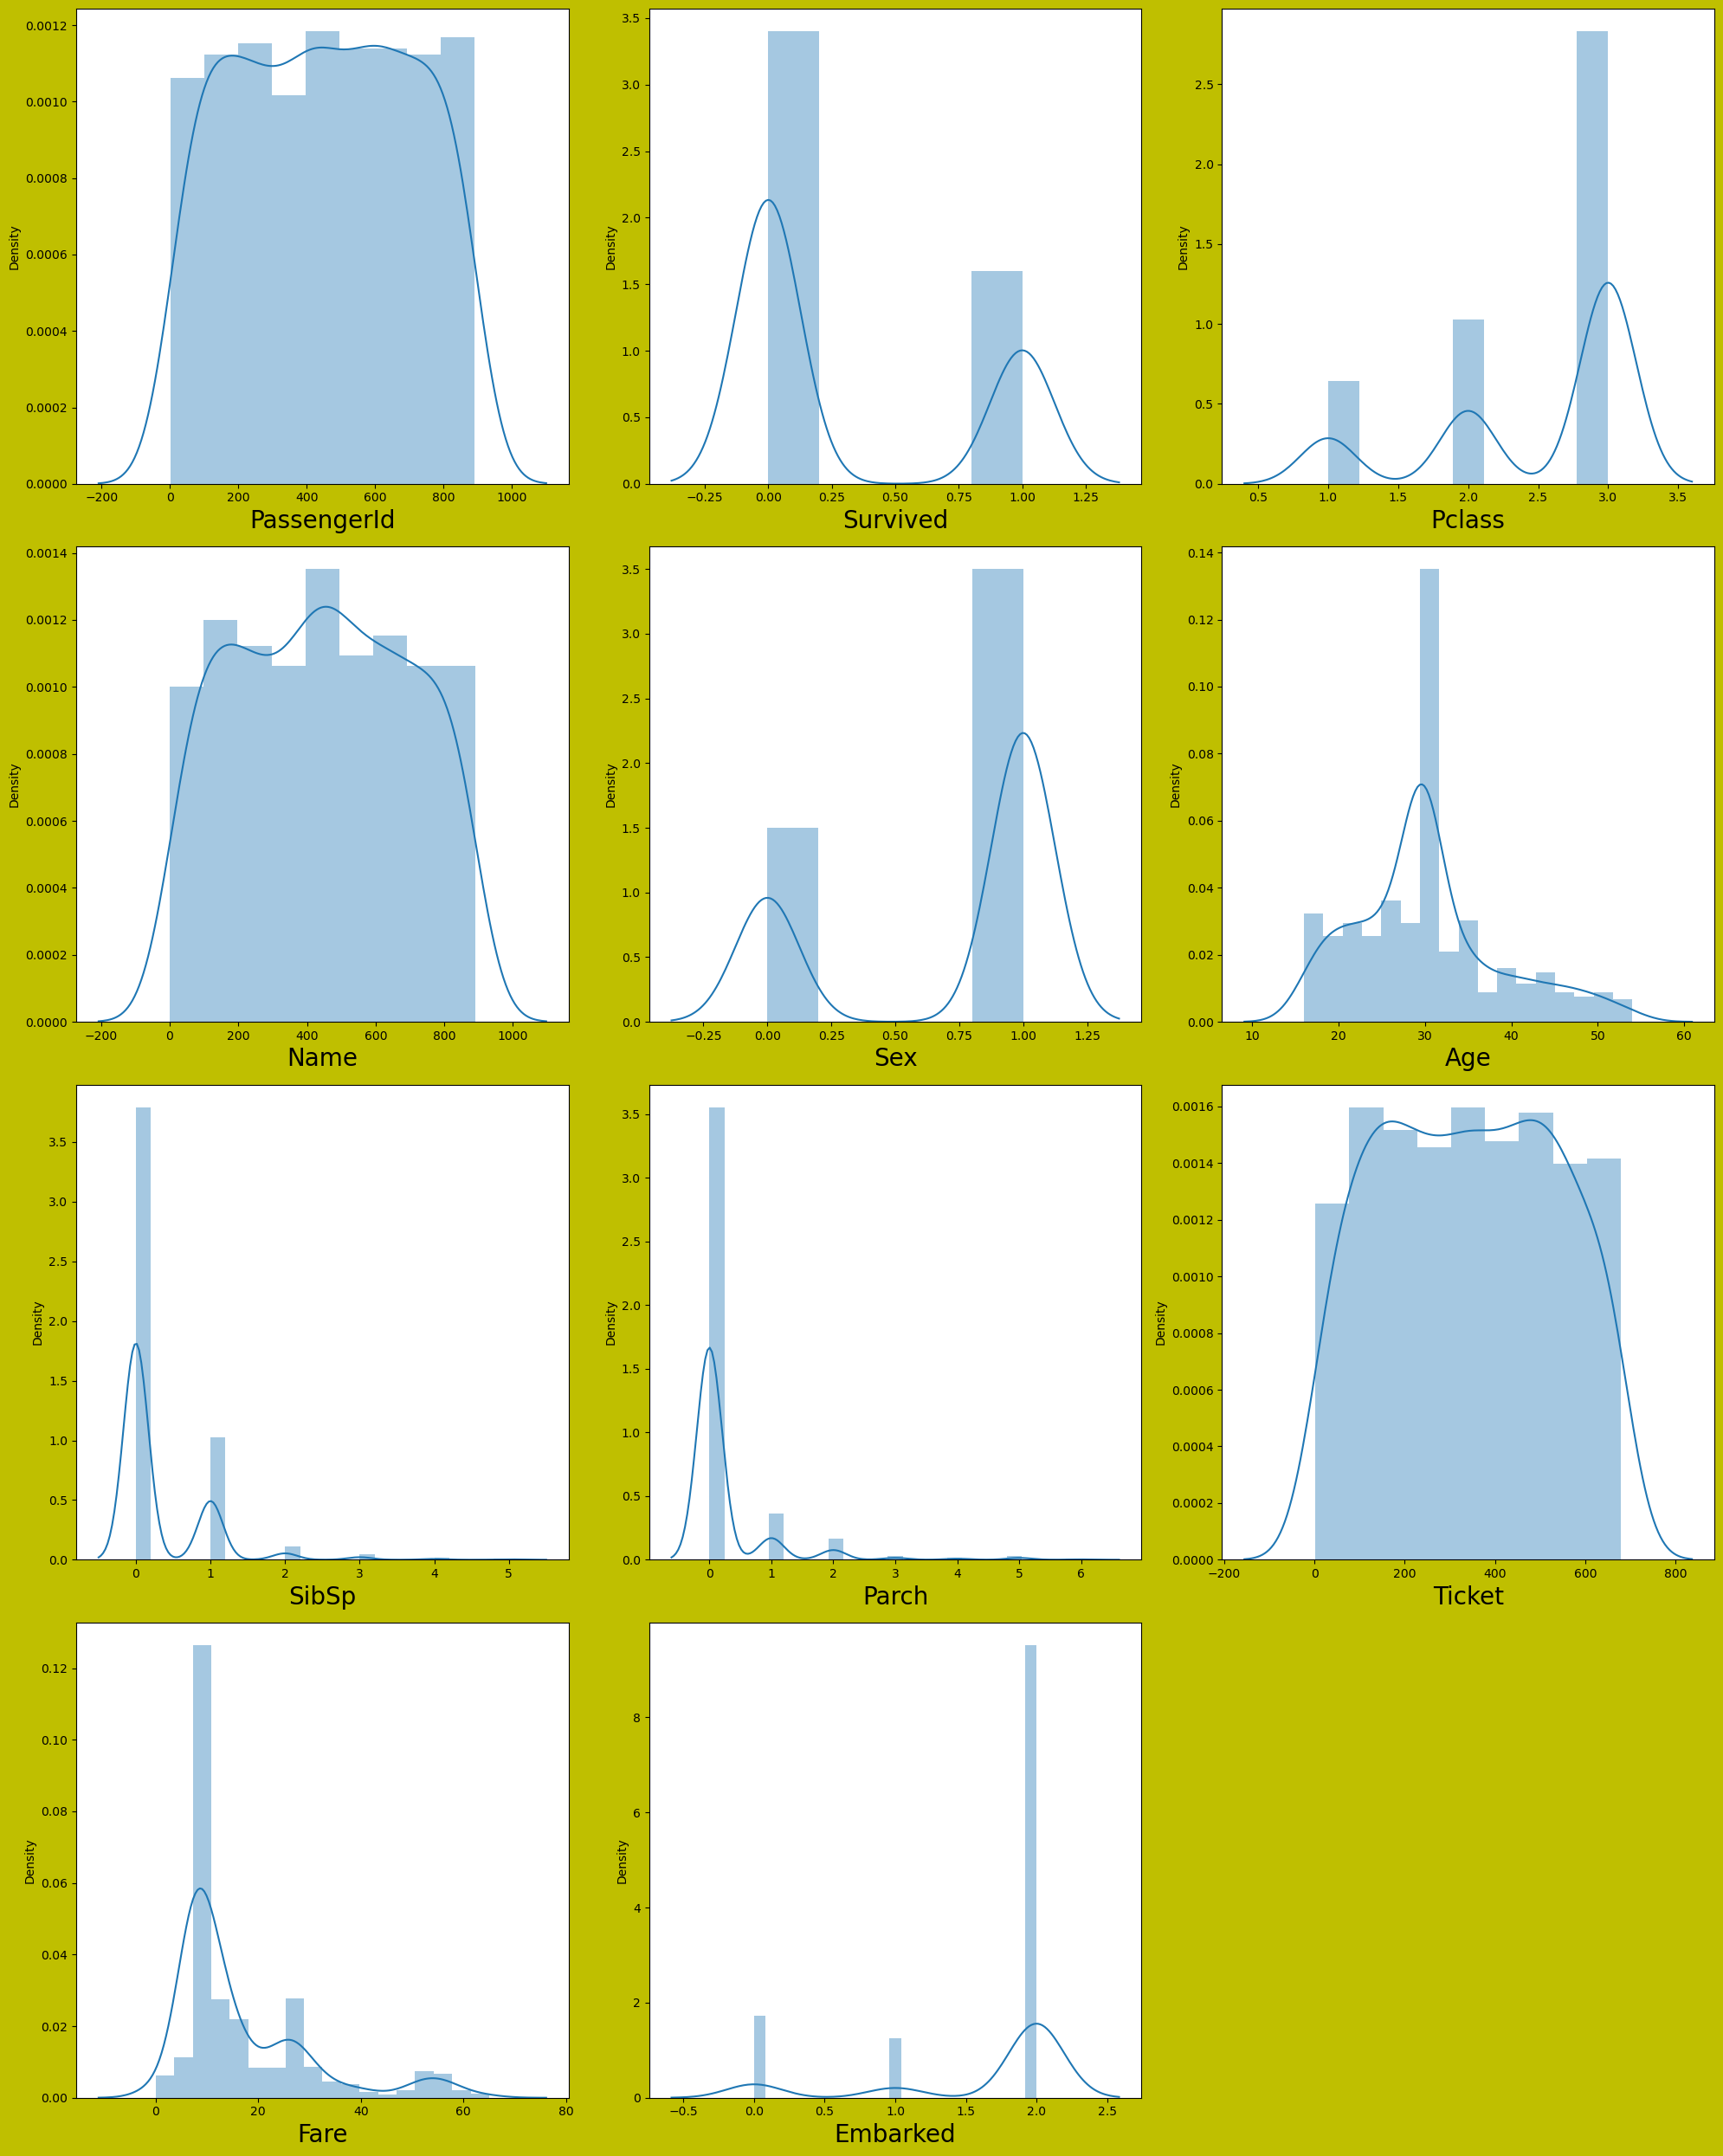

In [27]:
plt.figure(figsize=(20,25),facecolor="y")
plot=1
for i in data:
    if plot<=15:
        ax=plt.subplot(4,3,plot)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

In [28]:
data.skew()

PassengerId   -0.006878
Survived       0.774377
Pclass        -1.048806
Name           0.010712
Sex           -0.873280
Age            0.699810
SibSp          2.843464
Parch          4.084987
Ticket         0.015086
Fare           1.655620
Embarked      -1.575185
dtype: float64

In [29]:
data['Survived']=np.cbrt(data['Survived'])
data['Pclass']=np.cbrt(data['Pclass'])
data['Sex']=np.cbrt(data['Sex'])
data['Age']=np.cbrt(data['Age'])
data['SibSp']=np.cbrt(data['SibSp'])
data['Parch']=np.cbrt(data['Parch'])
data['Fare']=np.cbrt(data['Fare'])
data['Embarked']=np.cbrt(data['Embarked'])

In [30]:
data.shape

(666, 11)

In [31]:
data.skew()

PassengerId   -0.006878
Survived       0.774377
Pclass        -1.271161
Name           0.010712
Sex           -0.873280
Age            0.215138
SibSp          1.299735
Parch          2.189098
Ticket         0.015086
Fare          -0.226025
Embarked      -1.977992
dtype: float64

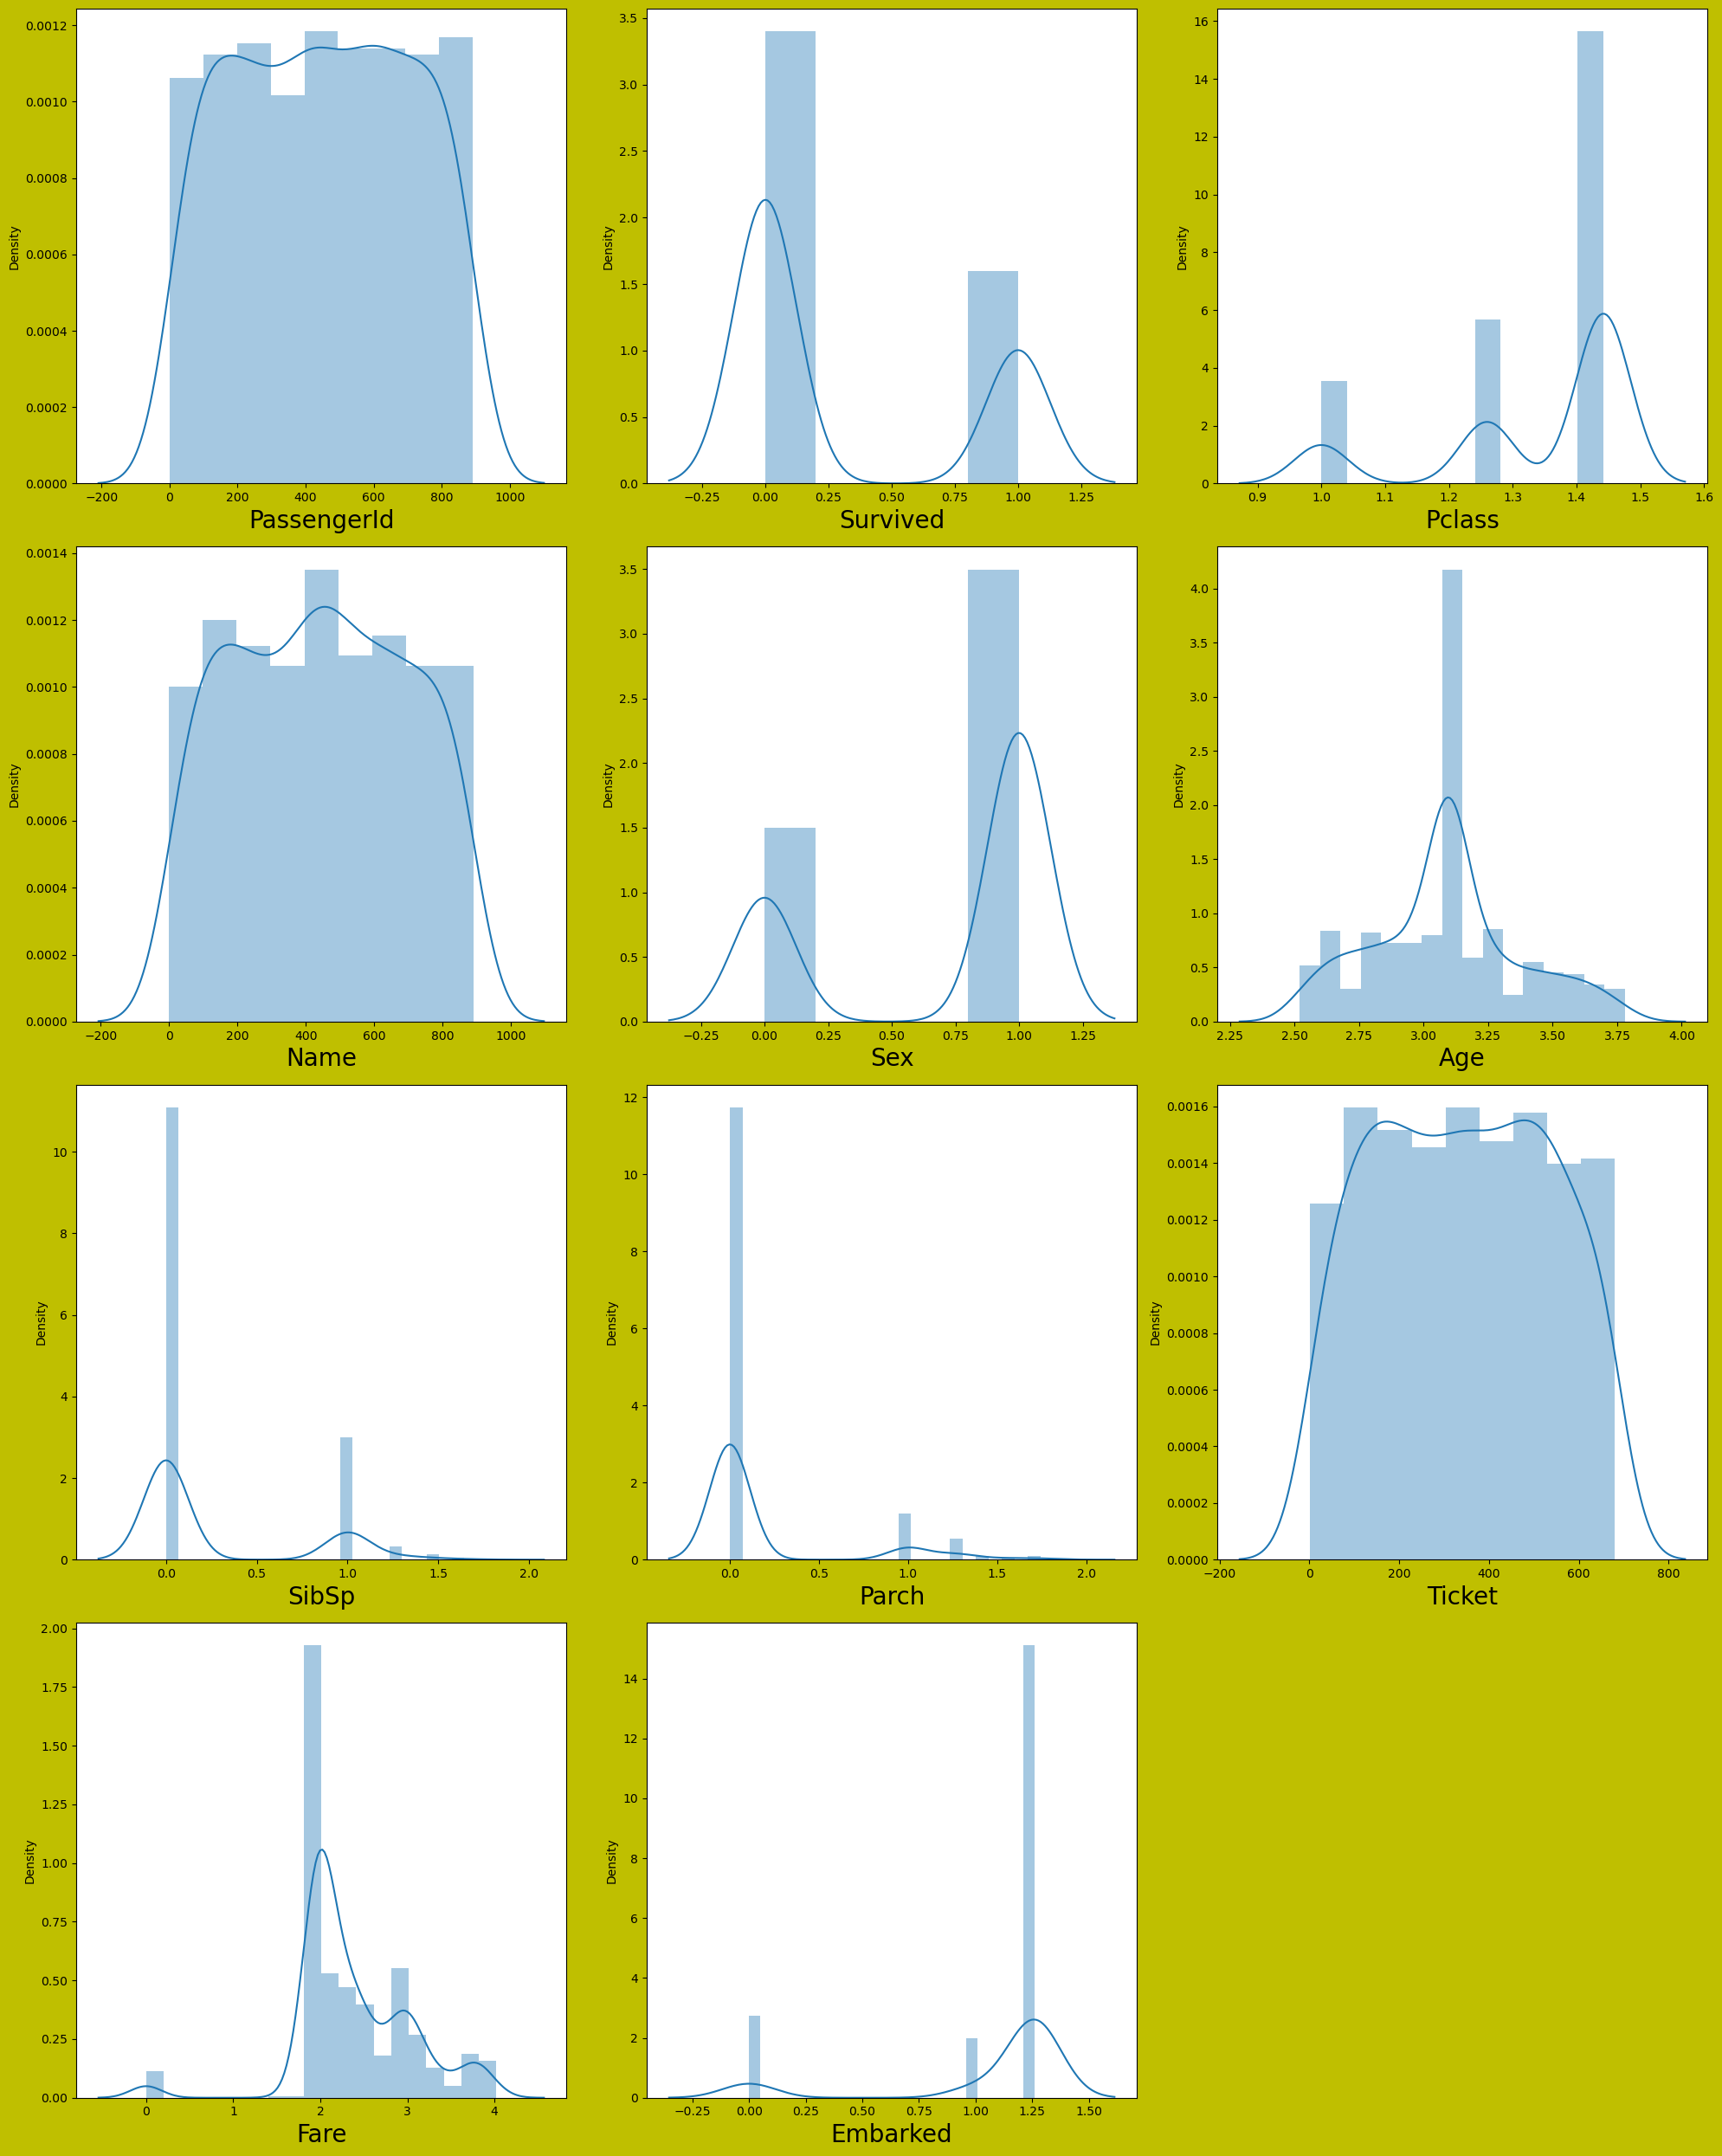

In [32]:
plt.figure(figsize=(20,25),facecolor="y")
plot=1
for i in data:
    if plot<=15:
        ax=plt.subplot(4,3,plot)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

In [33]:
x=data.drop(columns=['Survived'])
y=data.Survived

In [34]:
x.shape

(666, 10)

In [35]:
y.shape

(666,)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.752358,0.668544,-1.328028,0.655122,-0.996580,1.637057,-0.406993,0.943238,-0.681186,0.464182
1,-1.744557,0.668544,-0.358856,-1.526434,-0.433590,-0.558596,-0.406993,1.702193,-0.594032,0.464182
2,-1.740656,-2.155469,-0.679276,-1.526434,0.649083,1.637057,-0.406993,-1.520767,2.044730,0.464182
3,-1.736755,0.668544,-1.695918,0.655122,0.649083,-0.558596,-0.406993,0.678123,-0.578441,0.464182
4,-1.732855,0.668544,0.436261,0.655122,0.037673,-0.558596,-0.406993,-0.345946,-0.528614,-0.138495


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif=pd.DataFrame()
vif['vif_valuse']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [40]:
vif['features']=x.columns
vif

,vif_valuse,features
0,1.015583,PassengerId
1,1.777176,Pclass
2,1.025936,Name
3,1.154372,Sex
4,1.099032,Age
5,1.349090,SibSp
6,1.336967,Parch
7,1.208972,Ticket
8,1.912888,Fare
9,1.022588,Embarked


In [41]:
y.value_counts()

0.0    453
1.0    213
Name: Survived, dtype: int64

In [42]:
!pip install imblearn 

Defaulting to user installation because normal site-packages is not writeable


In [43]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [44]:
x1,y1=sm.fit_resample(x,y)

In [45]:
y.value_counts()

0.0    453
1.0    213
Name: Survived, dtype: int64

In [46]:
y1.value_counts()

0.0    453
1.0    453
Name: Survived, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=76)

In [49]:
print(x_train.shape,'-----',x_test.shape,'------',y_train.shape,'-----',y_test.shape)

(499, 10) ----- (167, 10) ------ (499,) ----- (167,)


In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [51]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
train_pred=rfc.predict(x_train)

In [54]:
accuracy_score(y_train,train_pred)*100

100.0

In [55]:
test_pred=rfc.predict(x_test)

In [56]:
accuracy_score(y_test,test_pred)

0.7964071856287425

In [57]:
params={'n_estimators':[12,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,12],
       'min_samples_leaf':[5,6]}

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
grid=GridSearchCV(rfc,param_grid=params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 12],
                         'n_estimators': [12, 15]})

In [60]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 15}

In [61]:
rfc_be=grid.best_estimator_

In [62]:
rfc_be.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=15)

In [63]:
n_pred=rfc_be.predict(x_train)

In [64]:
accuracy_score(y_train,n_pred)

0.8857715430861723

In [65]:
ntest_pred=rfc_be.predict(x_test)

In [66]:
accuracy_score(y_test,ntest_pred)

0.7844311377245509

In [67]:
import joblib

In [68]:
joblib.dump(rfc,'RFC.pkl')

['RFC.pkl']

In [69]:
joblib.dump(rfc_be,'RFC_be.pkl')

['RFC_be.pkl']

In [70]:
model=joblib.load('RFC.pkl')

In [71]:
prediction=model.predict(x_test)

In [72]:
model2=joblib.load('RFC_be.pkl')

In [73]:
prediction2=model2.predict(x_test)

In [74]:
prediction

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])

In [75]:
prediction2

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])

In [76]:
a=np.array(y_test)
df=pd.DataFrame()
df['RFC']=prediction
df['RFC_BE']=prediction2
df['original']=a
df

,RFC,RFC_BE,original
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,1.0,1.0
4,0.0,0.0,1.0
...,...,...,...
162,1.0,1.0,1.0
163,0.0,0.0,1.0
164,0.0,0.0,0.0
165,1.0,1.0,1.0
